In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from bidi import algorithm as bidialg
import arabic_reshaper

import seaborn as sns

# Read the file:

In [22]:
data=pd.read_excel('Khazna(Arabic).xlsx')
data.head()

,البنك,النوع,الرسالة,Unnamed: 3,Unnamed: 4
0,السعودي الفرنسي,سحب,شراء عبر نقاط البيع\nالمبلغ: 40.00 SAR\nاسم ال...,NaN,NaN
1,الراجحي,سحب,سحب:صراف آلي\nبطاقة:*1655;مدى\nمن:*4116\nمبلغ:...,NaN,NaN
2,السعودي الفرنسي,إيداع,حوالة واردة: محلية\nالمبلغ المحول: 2590.08 SAR...,NaN,NaN
3,ساب,سحب,شراء عبر نقاط البيع\nبطاقة: ***5053; MASTER; A...,NaN,NaN
4,السعودي للاستثمار,سحب,شراء انترنت\nبطاقة:XXX5393 سفر \nمن: USD\nمبلغ...,NaN,NaN


In [23]:
data.shape

(1025, 5)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   البنك       1011 non-null   object 
 1   النوع       1025 non-null   object 
 2   الرسالة     1025 non-null   object 
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 40.2+ KB


In [25]:
data.isna().sum()

البنك           14
النوع            0
الرسالة          0
Unnamed: 3    1025
Unnamed: 4    1025
dtype: int64

# Number of messages for each bank:

In [26]:
bank_data=data.groupby('البنك').agg(
    {
        'البنك':'count'
    }
)
bank_data['البنك']

البنك
الأهلي               137
الإنماء               53
البلاد                24
الجزيرة               12
الراجحي              485
الرياض                83
السعودي الفرنسي      104
السعودي للاستثمار     56
العربي الوطني          3
ساب                   54
Name: البنك, dtype: int64

In [27]:

l=[]
for i in bank_data.index:
    reshaped_text = arabic_reshaper.reshape(i)
    text = bidialg.get_display(reshaped_text )
    l.append(text)

# Percentage of messages for each bank in graphs:

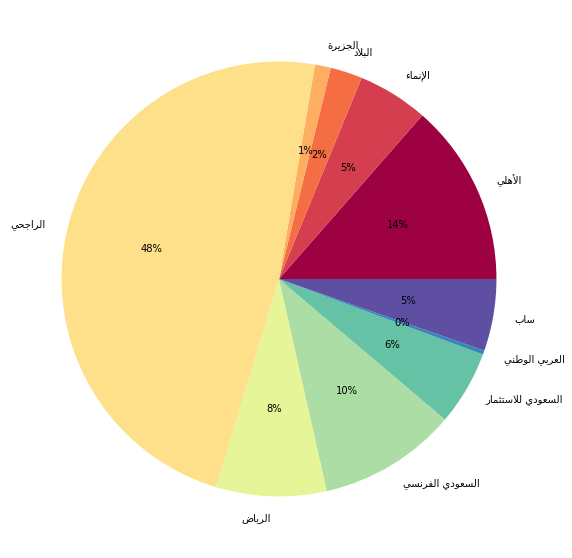

In [61]:

from bidi import algorithm as bidialg
#define Seaborn color palette to use
colors =  ['#9e0142', '#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd', '#5e4fa2']
#create pie chart
plt.figure(figsize=(10,10))
plt.pie(bank_data['البنك'], labels = l , colors = colors, autopct='%.0f%%')
plt.show()

<BarContainer object of 10 artists>

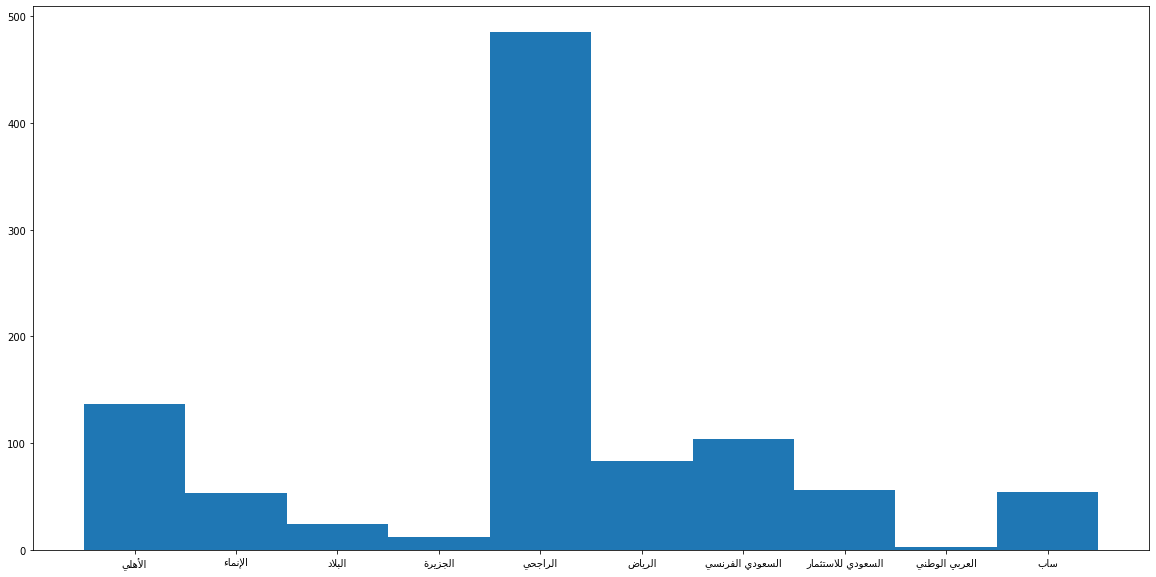

In [29]:
plt.figure(figsize=(20,10))
plt.bar(l,bank_data['البنك'],width=1)

In [30]:
present=[]
for i in bank_data['البنك']:
    present.append(round(i/len(data),3))
bank_data['%']=present
bank_data

,البنك,%
البنك,,
الأهلي,137,0.134
الإنماء,53,0.052
البلاد,24,0.023
الجزيرة,12,0.012
الراجحي,485,0.473
الرياض,83,0.081
السعودي الفرنسي,104,0.101
السعودي للاستثمار,56,0.055
العربي الوطني,3,0.003


# Data preprocessing:
## - Make type labels unique for the SVM

In [31]:
data['النوع'].unique()

array(['سحب ', 'سحب', 'إيداع', 'أخرى', 'إيداع '], dtype=object)

In [32]:
def lableFunction(x):
    if x=='سحب ':
        return 'سحب'
    elif x=='سحب':
        return 'سحب'
    elif x=='إيداع ':
        return 'إيداع'
    elif x=='إيداع':
        return 'إيداع'
    elif x=='أخرى':
        return 'أخرى'
    
data['النوع'].apply(lableFunction).unique()

array(['سحب', 'إيداع', 'أخرى'], dtype=object)

In [33]:
data['النوع']=data['النوع'].apply(lableFunction)

# Number of messages for each type:

In [34]:
llll={}
for i in bank_data.index:
    llll[i]=data.loc[data['البنك']==i].groupby('النوع').agg({
        'النوع':'count'
    })['النوع']

In [35]:
pd.DataFrame(llll)

,الأهلي,الإنماء,البلاد,الجزيرة,الراجحي,الرياض,السعودي الفرنسي,السعودي للاستثمار,العربي الوطني,ساب
النوع,,,,,,,,,,
أخرى,22,6,3,5,48,5,20,20,2.0,6
إيداع,35,17,9,3,104,10,34,12,NaN,7
سحب,80,30,12,4,333,68,50,24,1.0,41


# Import SVM packages:

In [36]:
from sklearn.svm import SVC 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Assign a value for each type of massage:

In [37]:
def lableEncoderFunc(x):
    if x=='سحب':
        return 0
    elif x=='إيداع':
        return 1
    elif x=='أخرى':
        return 2
data['النوع']=data['النوع'].apply(lableEncoderFunc)
data.head(2)

,البنك,النوع,الرسالة,Unnamed: 3,Unnamed: 4
0,السعودي الفرنسي,0,شراء عبر نقاط البيع\nالمبلغ: 40.00 SAR\nاسم ال...,NaN,NaN
1,الراجحي,0,سحب:صراف آلي\nبطاقة:*1655;مدى\nمن:*4116\nمبلغ:...,NaN,NaN


# Clean the messages:

In [38]:
import re
nonAlabic = re.compile('([@A-Za-z0-9_]+)|[^\w\s]|#|http\S+|\n')
nonAlabic.sub('', data['الرسالة'][0])

'شراء عبر نقاط البيعالمبلغ  اسم المتجر نوع البطاقة مدى منفذة من خلال أثيررقم البطاقة التاريخ الوقت '

In [39]:
data['الرسالة']=data['الرسالة'].apply(lambda x : nonAlabic.sub(' ', x))
data.head(5)

,البنك,النوع,الرسالة,Unnamed: 3,Unnamed: 4
0,السعودي الفرنسي,0,شراء عبر نقاط البيع المبلغ اسم المتجر ...,NaN,NaN
1,الراجحي,0,سحب صراف آلي بطاقة مدى من مبلغ مكا...,NaN,NaN
2,السعودي الفرنسي,1,حوالة واردة محلية المبلغ المحول اسم ال...,NaN,NaN
3,ساب,0,شراء عبر نقاط البيع بطاقة مبلغ ...,NaN,NaN
4,السعودي للاستثمار,0,شراء انترنت بطاقة سفر من مبلغ لدى...,NaN,NaN


# Transform the message text into a vector

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
counter_of_message= cv.fit_transform(data['الرسالة'])
counter_of_message.toarray()[3]

array([0, 0, 0, ..., 0, 0, 0])

# Train and test

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(counter_of_message.toarray(),data['النوع'],train_size=.8,random_state=2)

## Looking for better performance

In [49]:
model_params={
    'SVC':{
        'model':SVC(),
        'params':{
            'C':[0.1,1, 10, 100, 1000],
            'kernel' : ['linear', 'poly', 'rbf',],
            'gamma' : [1,0.1,0.01,0.001,0.0001]
        }
    },
}

In [50]:
from sklearn.model_selection import GridSearchCV
scorre=[]
for mn,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scorre.append({
        'model name ': mn,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_,
    })

df=pd.DataFrame(scorre)
df

,model name,best_score,best_params
0,SVC,0.978049,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}"


In [53]:
scorre

[{'model name ': 'SVC',
  'best_score': 0.978048780487805,
  'best_params': {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}}]

# Start train the data:

In [55]:
from sklearn.svm import SVC 

model=SVC(
    C=5,
    gamma= 0.01, 
    kernel= 'rbf'
)
model.fit(X_train,y_train)

SVC(C=5, gamma=0.01)

### Accuracy:

In [56]:
model.score(X_test,y_test)

0.9512195121951219

# Confusion matrix:

In [57]:
from sklearn.metrics import classification_report,confusion_matrix
p=model.predict(X_test)
confusion_matrix(y_test,p)

array([[120,   0,   1],
       [  5,  44,   0],
       [  2,   2,  31]])

# Classification report:

In [58]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       121
           1       0.96      0.90      0.93        49
           2       0.97      0.89      0.93        35

    accuracy                           0.95       205
   macro avg       0.96      0.93      0.94       205
weighted avg       0.95      0.95      0.95       205



C:\Users\isara\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


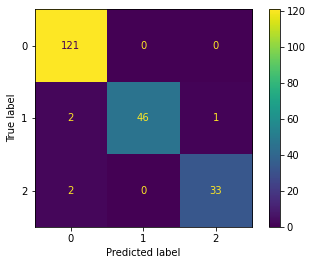

In [34]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import joblib

plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# Prepare pipeline model:

In [53]:
X_trainpip, X_testpip, y_trainpip, y_testpip = train_test_split(data['الرسالة'],data['النوع'],train_size=.8,random_state=2)

In [54]:
from sklearn.pipeline import Pipeline

pip=Pipeline([
    ('vector',CountVectorizer()),
    ('SVC',SVC(
    C=5,
    degree= 1, 
    gamma= 'scale', 
    kernel= 'rbf'
)),
])

pip.fit(X_trainpip,y_trainpip)

Pipeline(steps=[('vector', CountVectorizer()), ('SVC', SVC(C=5, degree=1))])

### Accuracy:

In [70]:
pip.score(X_testpip,y_testpip)

0.9607843137254902

# Tests:

In [71]:
x='''""حوالة صادرة: محلية مقبولة
مصرف:RIYADH BANK
من:*2067
مبلغ:SAR 100.00
الى:sara ibrahim
لآيبان:*9940
الرسوم:SAR 0.58
مرجع:9116092200073716
في:22-09-16 01:03
"
"
'''
pip.predict([x])

array([0], dtype=int64)

In [72]:
x= '''حوالة واردة:داخلية
مبلغ:SAR 200.00
الى:*2067
من:منال الرميحي
من حساب:*9165
في:22-09-15 19:27
'''
pip.predict([x])

array([1], dtype=int64)

In [73]:
x= '''كلمة مرور لمرة واحدة
رمز:6821
لـ :اضافة المستفيد - تطبيق المباشر
'''
pip.predict([x])

array([2], dtype=int64)

In [74]:
x= '''مز التفعيل 2628 للدخول إلى الأهلي موبايل في ‬‪20/09/2022 ‬‪07:19 
مشاركة الرمز مع الآخرين يعرضك للاحتيال المباشر
'''
pip.predict([x])

array([2], dtype=int64)

In [75]:
x= '''حوالة واردة مكافأة طلاب
مبلغ 990SAR 
حساب103*594
في29/08/2022 04:07المباشر
'''
pip.predict([x])

array([1], dtype=int64)

In [76]:
x= '''حوالة صادرة مكافأة طلاب
مبلغ 990SAR 
حساب103*594
في29/08/2022 04:07المباشر
'''
pip.predict([x])

array([0], dtype=int64)

In [77]:
x= '''ايداع:صراف آلي
الى:*9553
مبلغ:SAR 10000.00
في:22-07-25 19:52
'''
pip.predict([x])

array([1], dtype=int64)

In [78]:
x= '''شراء انترنت
بطاقة:*9543;مدى(Apple Pay)
من:*9553
لدى:STC Pay
مبلغ:SAR 22.87
في:22-07-25 09:49
'''
pip.predict([x])

array([0], dtype=int64)